In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('/Users/sruthi/Documents/My projects/HEADSTARTER/Anomaly Detection/FinancialMarketData_EWS.csv')

In [3]:
df.head()

,Y,Data,XAU BGNL,ECSURPUS,BDIY,CRY,DXY,JPY,GBP,Cl1,...,LP01TREU,EMUSTRUU,LF94TRUU,MXUS,MXEU,MXJP,MXBR,MXRU,MXIN,MXCN
0,0,1/11/2000,283.25,0.077,1388.0,157.26,100.56,105.86,1.646,25.77,...,116.464,230.527,123.762,1416.12,127.75,990.59,856.76,224.33,217.34,34.30
1,0,1/18/2000,287.65,0.043,1405.0,165.01,101.86,105.47,1.638,28.85,...,117.267,231.377,123.762,1428.79,129.50,993.98,925.22,234.37,227.08,32.74
2,0,1/25/2000,287.15,0.135,1368.0,167.24,102.41,106.04,1.650,28.28,...,117.995,232.390,123.762,1385.93,126.48,974.83,886.93,216.82,233.00,32.46
3,0,2/1/2000,282.75,0.191,1311.0,166.85,104.92,107.85,1.611,28.22,...,120.510,231.942,122.328,1385.31,129.19,1007.12,842.60,201.89,237.48,31.29
4,1,2/8/2000,298.40,0.312,1277.0,165.43,104.22,109.30,1.611,28.02,...,118.791,237.812,122.328,1411.95,134.67,1034.58,945.15,218.00,258.02,31.32


In [4]:
df.describe()

,Y,XAU BGNL,ECSURPUS,BDIY,CRY,DXY,JPY,GBP,Cl1,VIX,...,LP01TREU,EMUSTRUU,LF94TRUU,MXUS,MXEU,MXJP,MXBR,MXRU,MXIN,MXCN
count,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,...,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000
mean,0.213321,987.463744,0.036153,2259.860486,245.247670,90.934982,106.605734,1.569661,60.708101,19.992169,...,232.109985,704.379545,259.052717,1606.997102,107.877138,784.846292,1903.216436,648.681377,693.156616,53.933159
std,0.409837,494.623740,0.349453,2017.811888,68.278066,11.379095,12.840754,0.212344,25.900813,8.642157,...,109.917628,309.951757,75.934451,698.481956,20.795973,200.076443,986.468254,299.096020,405.527014,24.738356
min,0.000000,256.680000,-0.974000,291.000000,106.293000,71.329000,75.940000,1.172000,10.010000,9.430000,...,80.797000,230.527000,121.331000,663.690000,56.300000,431.710000,280.500000,151.250000,112.600000,13.460000
25%,0.000000,433.740000,-0.191000,990.000000,184.705550,81.240500,101.565000,1.418000,39.625000,13.640000,...,131.025000,434.661000,205.315500,1103.925000,90.605000,601.615000,1042.645000,463.195000,278.385000,28.565000
50%,0.000000,1137.800000,0.035000,1518.000000,234.560000,89.716000,108.720000,1.562000,57.400000,17.980000,...,213.205000,714.807000,264.770000,1324.430000,111.320000,786.830000,1860.960000,612.930000,691.530000,58.740000
75%,0.000000,1324.825000,0.260500,2685.500000,301.539500,97.404000,116.220000,1.677500,79.640000,23.625000,...,342.884500,939.824500,320.753000,1992.445000,126.470000,965.875000,2533.770000,793.620000,1014.750000,68.460000
max,1.000000,2006.910000,0.991000,11793.000000,467.570000,119.820000,134.630000,2.085000,140.970000,75.910000,...,431.552800,1286.353000,398.706500,4043.690000,146.390000,1210.580000,4721.360000,1617.640000,1730.510000,129.200000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1111 entries, 0 to 1110
Data columns (total 44 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Y          1111 non-null   int64  
 1   Data       1111 non-null   object 
 2   XAU BGNL   1111 non-null   float64
 3   ECSURPUS   1111 non-null   float64
 4   BDIY       1111 non-null   float64
 5   CRY        1111 non-null   float64
 6   DXY        1111 non-null   float64
 7   JPY        1111 non-null   float64
 8   GBP        1111 non-null   float64
 9   Cl1        1111 non-null   float64
 10  VIX        1111 non-null   float64
 11  USGG30YR   1111 non-null   float64
 12  GT10       1111 non-null   float64
 13  USGG2YR    1111 non-null   float64
 14  USGG3M     1111 non-null   float64
 15  US0001M    1111 non-null   float64
 16  GTDEM30Y   1111 non-null   float64
 17  GTDEM10Y   1111 non-null   float64
 18  GTDEM2Y    1111 non-null   float64
 19  EONIA      1111 non-null   float64
 20  GTITL30Y

In [6]:
from openai import OpenAI
import os
from dotenv import load_dotenv
load_dotenv()

True

In [7]:
# Initialize OpenAI client
client = OpenAI(
    base_url="https://api.groq.com/openai/v1",
    api_key=os.getenv("GROQ_API_KEY")
)

In [8]:
# Asking LLM to explain the data
query_data = df.head(10)
system_prompt = '''You are an expert financial analyst with machine learning background. You also have knowledge of how to detect anomalies in financial data. 
If given a dataframe, you will explain all column headers in a simple way.
Give context of how the column headers are related to each other and how they can affect the financial market.
Explain whether each column header will contribute to market crashes or anomalies in the financial market.
Out of all columns headers, explain which are the key columns required to train an ML model that can detect market anomalies.
Explain if any columns need to be dropped in order to create an accurate model.
'''
augmented_query = f"This is the data: {query_data}. variable Y in the dataframe is a binary indicator of a market anomaly or not."

In [9]:
llm_response = client.chat.completions.create(
       model="llama-3.1-8b-instant",
       messages=[
           {"role": "system", "content": system_prompt},
           {"role": "user", "content": augmented_query}
       ]
   )

print(llm_response.choices[0].message.content)

After examining the dataframe, I'll explain each column's purpose, its relationship with other columns, and its potential impact on the financial market. I'll also identify the key columns for training an ML model to detect market anomalies.

**Column Explanations**

1. **Y**: Binary indicator (0/1) of a market anomaly or not. This column is the target variable for the ML model.
2. **Data**: Date of the data point.
3. **XAU**, **BDIY**, **CRY**, **DXY**, **GBR**, **JPY**: Exchange rates of different currencies (Gold, British Pound, Euro, Japanese Yen, etc.).
4. **ECSURPUS**: Indicates the price of a specific stock or instrument.
5. **MXUS**, **MXEU**, **MXJP**, **MXBR**, etc.: Index values of different stock market indices (e.g., US, Eurozone, Japan, Brazil).
6. **MXRU**, **MXIN**, **MXCN**, etc.: Index values of different stock market indices (e.g., Russia, India, China).
7. **LP01TREU**: Value of a specific financial instrument ( probably a bond).
8. **EMUSTRUU**, **LF94TRUU**: Value

In [10]:
# Rename Data to Date 
df.rename(columns={'Data': 'Date'}, inplace=True)

# convert Data to datetime type
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')

# sort the data by date
df = df.sort_values(by = 'Date')

In [427]:
# df['Y'] = df['Y'].replace(0, -1)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1111 entries, 0 to 1110
Data columns (total 44 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Y          1111 non-null   int64         
 1   Date       1111 non-null   datetime64[ns]
 2   XAU BGNL   1111 non-null   float64       
 3   ECSURPUS   1111 non-null   float64       
 4   BDIY       1111 non-null   float64       
 5   CRY        1111 non-null   float64       
 6   DXY        1111 non-null   float64       
 7   JPY        1111 non-null   float64       
 8   GBP        1111 non-null   float64       
 9   Cl1        1111 non-null   float64       
 10  VIX        1111 non-null   float64       
 11  USGG30YR   1111 non-null   float64       
 12  GT10       1111 non-null   float64       
 13  USGG2YR    1111 non-null   float64       
 14  USGG3M     1111 non-null   float64       
 15  US0001M    1111 non-null   float64       
 16  GTDEM30Y   1111 non-null   float64       


In [12]:
# drop rows that have NaN values
df.dropna(inplace=True)

In [13]:
# create a day and month column
df['Month'] = df['Date'].dt.month

In [14]:
df

,Y,Date,XAU BGNL,ECSURPUS,BDIY,CRY,DXY,JPY,GBP,Cl1,...,EMUSTRUU,LF94TRUU,MXUS,MXEU,MXJP,MXBR,MXRU,MXIN,MXCN,Month
0,0,2000-01-11,283.25,0.077,1388.0,157.2600,100.560,105.86,1.6460,25.77,...,230.527,123.7620,1416.12,127.75,990.59,856.76,224.33,217.34,34.30,1
1,0,2000-01-18,287.65,0.043,1405.0,165.0100,101.860,105.47,1.6380,28.85,...,231.377,123.7620,1428.79,129.50,993.98,925.22,234.37,227.08,32.74,1
2,0,2000-01-25,287.15,0.135,1368.0,167.2400,102.410,106.04,1.6500,28.28,...,232.390,123.7620,1385.93,126.48,974.83,886.93,216.82,233.00,32.46,1
3,0,2000-02-01,282.75,0.191,1311.0,166.8500,104.920,107.85,1.6110,28.22,...,231.942,122.3280,1385.31,129.19,1007.12,842.60,201.89,237.48,31.29,2
4,1,2000-02-08,298.40,0.312,1277.0,165.4300,104.220,109.30,1.6110,28.02,...,237.812,122.3280,1411.95,134.67,1034.58,945.15,218.00,258.02,31.32,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1106,0,2021-03-23,1727.96,0.339,2271.0,184.5022,92.336,108.72,1.3760,57.76,...,1249.403,389.8500,3800.77,140.32,1199.57,1671.73,681.21,1695.96,110.83,3
1107,0,2021-03-30,1685.56,0.303,2103.0,184.8741,93.297,110.29,1.3719,60.55,...,1242.264,385.8145,3835.96,142.76,1206.29,1635.57,693.38,1690.76,108.80,3
1108,0,2021-04-06,1743.28,0.440,2092.0,185.8393,92.335,109.88,1.3822,59.33,...,1250.256,390.6819,3955.16,144.13,1194.62,1689.62,673.20,1689.48,111.92,4
1109,0,2021-04-13,1742.69,0.467,2140.0,188.1368,91.852,109.19,1.3737,60.18,...,1252.563,390.3848,4027.05,144.23,1197.06,1680.82,680.23,1672.46,108.40,4


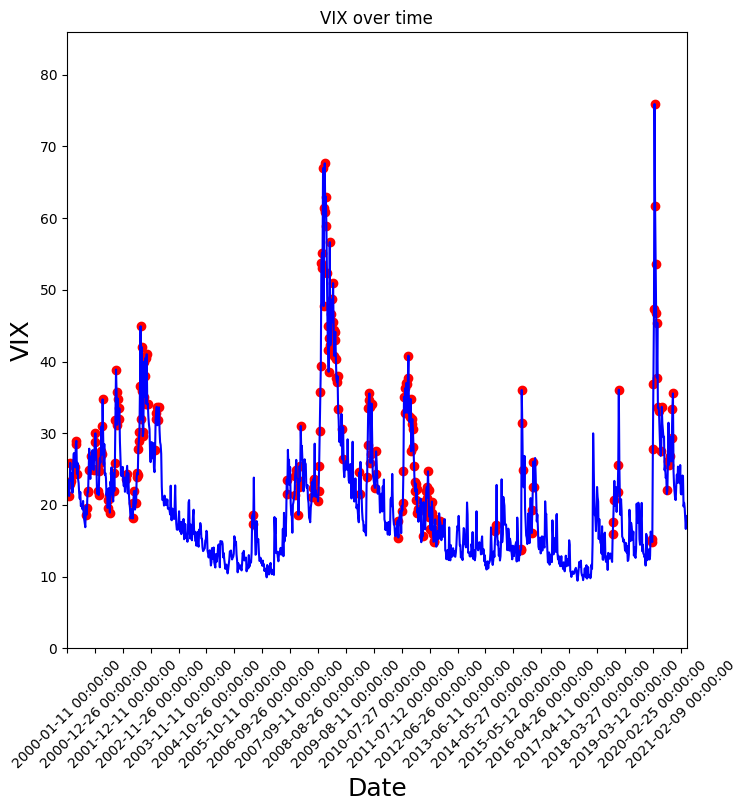

In [15]:
# Data Visualizations 
# plot anomalies with respect to VIX over time

plt.figure(figsize=(8,8))
plt.xlim(0, df.shape[0])
plt.ylim(0, df['VIX'].max() + 10)
plt.plot(df['VIX'], color='blue', label='VIX')
plt.scatter(df[df['Y'] == 1].index, df[df['Y'] == 1]['VIX'], color='red', label='Anomaly')
plt.title('VIX over time')
plt.xticks(range(0, df.shape[0], 50), df['Date'].iloc[::50], rotation = 45)
plt.xlabel('Date', fontsize = 18)
plt.ylabel('VIX', fontsize = 18)
plt.show()
     

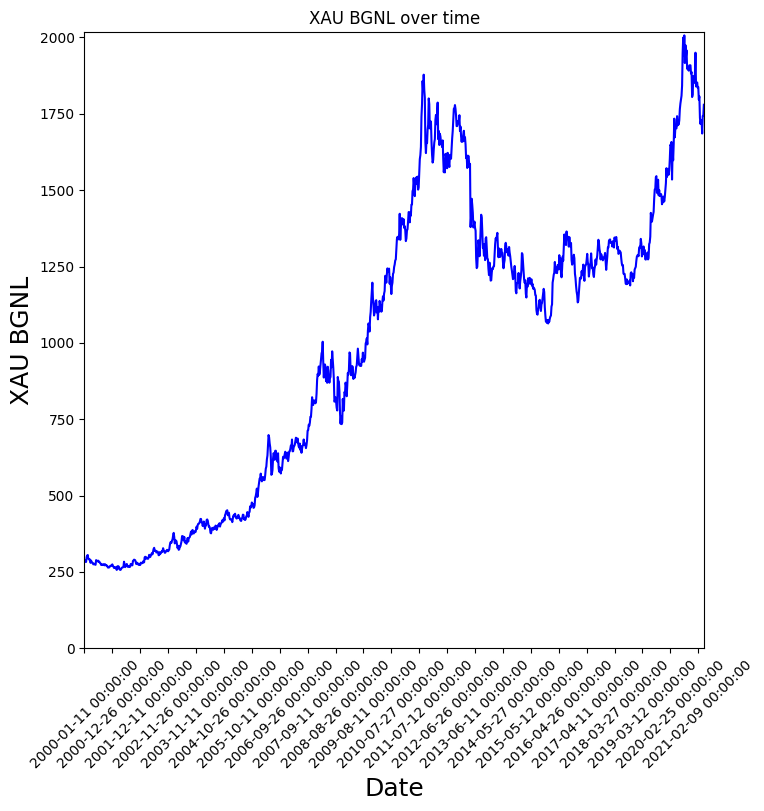

In [16]:
# Data Visualizations
plt.figure(figsize=(8,8))
plt.xlim(0, df.shape[0])
plt.ylim(0, df['XAU BGNL'].max() + 10)
plt.plot(df['XAU BGNL'], color='blue', label='XAU BGNL')
plt.title('XAU BGNL over time')
plt.xticks(range(0, df.shape[0], 50), df['Date'].iloc[::50], rotation = 45)
plt.xlabel('Date', fontsize = 18)
plt.ylabel('XAU BGNL', fontsize = 18)
plt.show()

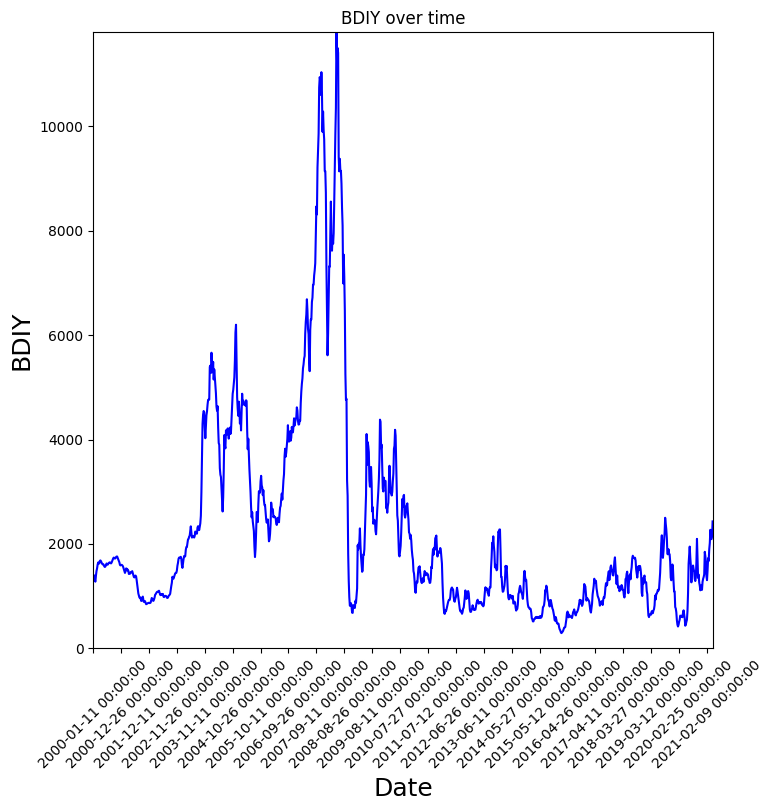

In [17]:
# Data Visualizations
plt.figure(figsize=(8,8))
plt.xlim(0, df.shape[0])
plt.ylim(0, df['BDIY'].max() + 10)
plt.plot(df['BDIY'], color='blue', label='BDIY')
plt.title('BDIY over time')
plt.xticks(range(0, df.shape[0], 50), df['Date'].iloc[::50], rotation = 45)
plt.xlabel('Date', fontsize = 18)
plt.ylabel('BDIY', fontsize = 18)
plt.show()

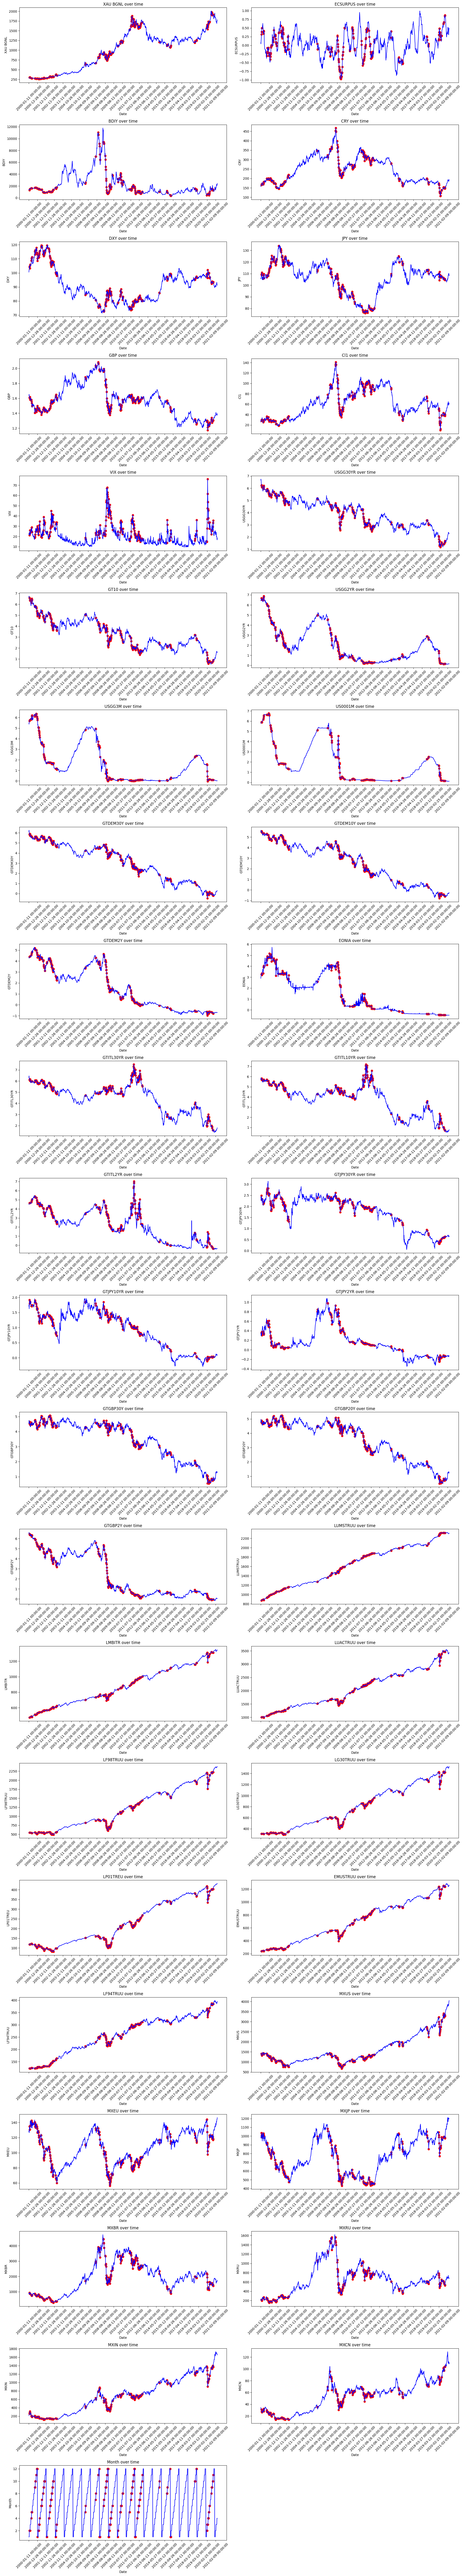

In [18]:
# Set the grid dimensions
num_columns = 2  # number of plots per row
num_rows = (len(df.columns) + num_columns - 1) // num_columns  #calculate the required rows

# Set the figure size
plt.figure(figsize=(20, 5 * num_rows))

# Loop through each column
for idx, column in enumerate(df.columns):
    if column == 'Date' or column == 'Y': 
        continue

    plt.subplot(num_rows, num_columns, idx + 1)  
    plt.plot(df[column], label=column, color='blue') 
    plt.title(f"{column} over time") 
    
    plt.scatter(
        df[df['Y'] == 1].index,  # X-axis is the index of the anomalies
        df[df['Y'] == 1][column],  # Y-axis is the value of the column for anomalies
        color='red', 
        label='Anomaly'
    )
    plt.xticks(range(0, df.shape[0], 50), df['Date'].iloc[::50], rotation=45)
    plt.xlabel("Date", fontsize=10)
    plt.ylabel(column, fontsize=10)

# Adjust layout
plt.tight_layout()
plt.show()


In [19]:
correlation_matrix = df.corr()
# print(correlation_matrix)
strong_correlations = correlation_matrix[(correlation_matrix.abs()> 0.8) & (correlation_matrix != 1)]
strong_correlations[['GT10', 'USGG30YR',  'USGG2YR', 'USGG3M', 'US0001M', 'GTDEM10Y', 'GTDEM30Y', 'GTDEM2Y', 'GTITL10YR', 'GTITL2YR', 'GTJPY30YR', 'GTJPY10YR', 'GTJPY2YR']]

,GT10,USGG30YR,USGG2YR,USGG3M,US0001M,GTDEM10Y,GTDEM30Y,GTDEM2Y,GTITL10YR,GTITL2YR,GTJPY30YR,GTJPY10YR,GTJPY2YR
Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Date,-0.881477,-0.932811,NaN,NaN,NaN,-0.966089,-0.966432,-0.914324,NaN,-0.823784,-0.833647,-0.868718,NaN
XAU BGNL,-0.893317,-0.868696,NaN,NaN,NaN,-0.835680,-0.828390,-0.837306,NaN,NaN,NaN,NaN,NaN
ECSURPUS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BDIY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CRY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DXY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
JPY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GBP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cl1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
strong_correlations[['MXUS', 'MXEU', 'MXIN', 'MXJP', 'MXCN','MXBR', 'MXRU', 'JPY', 'GBP']]

,MXUS,MXEU,MXIN,MXJP,MXCN,MXBR,MXRU,JPY,GBP
Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Date,0.833765,NaN,0.964150,NaN,0.872759,NaN,NaN,NaN,NaN
XAU BGNL,NaN,NaN,0.831756,NaN,0.829659,NaN,NaN,NaN,NaN
ECSURPUS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BDIY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CRY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DXY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
JPY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GBP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cl1,NaN,NaN,NaN,NaN,NaN,0.861036,NaN,NaN,NaN


Dropping JPY and GBP- as they are more reactive to the market than proactive. 


In [ ]:
for column in df.columns:
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()

In [21]:
# Create the features and target variable
# Dropping columns that are not required as per above graphs and correlation matrix
features = df.drop(columns = ['Y', 'Date'])
selected_features = df.drop(columns=['Y', 'Date', 'Cl1', 'JPY', 'GBP', 'USGG2YR', 'USGG3M', 'US0001M', 'GTDEM30Y', 'GTDEM10Y', 'GTDEM2Y', 'GTITL10YR', 'GTITL2YR', 'GTJPY10YR', 'GTJPY2YR', 'GTGBP20Y', 'GTGBP2Y', 'LUMSTRUU','LMBITR', 'LUACTRUU','LF98TRUU', 'LG30TRUU','LP01TREU', 'EMUSTRUU', 'LF94TRUU', 'MXBR', 'MXCN', 'Month'])
target = df['Y']

In [22]:
selected_features.columns

Index(['XAU BGNL', 'ECSURPUS', 'BDIY', 'CRY', 'DXY', 'VIX', 'USGG30YR', 'GT10',
       'EONIA', 'GTITL30YR', 'GTJPY30YR', 'GTGBP30Y', 'MXUS', 'MXEU', 'MXJP',
       'MXRU', 'MXIN'],
      dtype='object')

In [163]:
# Add exponential moving average for the VIX index and the XAU BGNL index
selected_features['VIX_EMA'] = selected_features['VIX'].ewm(span=50, adjust=False).mean()
selected_features['BDIY_EMA'] = selected_features['BDIY'].ewm(span=50, adjust=False).mean()
selected_features['DXY'] = selected_features['DXY'].ewm(span=50, adjust=False).mean()

In [167]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(selected_features, target, test_size=0.2, random_state=42, shuffle = False)

In [168]:
X_train

,XAU BGNL,ECSURPUS,BDIY,CRY,DXY,VIX,USGG30YR,GT10,EONIA,GTITL30YR,GTJPY30YR,GTGBP30Y,MXUS,MXEU,MXJP,MXRU,MXIN,VIX_EMA,BDIY_EMA,Anomaly
0,283.25,0.077,1388.0,157.260,100.560000,22.50,6.671,6.657,2.890,6.321,2.422,4.535,1416.12,127.75,990.59,224.33,217.34,22.500000,1388.000000,0
1,287.65,0.043,1405.0,165.010,100.560129,21.50,6.747,6.748,3.030,6.459,2.418,4.746,1428.79,129.50,993.98,234.37,227.08,22.460784,1388.666667,0
2,287.15,0.135,1368.0,167.240,100.560552,23.02,6.634,6.692,3.150,6.281,2.259,4.691,1385.93,126.48,974.83,216.82,233.00,22.482714,1387.856209,0
3,282.75,0.191,1311.0,166.850,100.561659,23.45,6.423,6.619,3.300,6.188,2.330,4.593,1385.31,129.19,1007.12,201.89,237.48,22.520647,1384.842240,0
4,298.40,0.312,1277.0,165.430,100.563712,21.25,6.231,6.613,3.260,6.118,2.481,4.548,1411.95,134.67,1034.58,218.00,258.02,22.470818,1380.613133,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
883,1156.94,0.353,1052.0,193.457,94.444579,12.72,3.131,2.472,-0.348,2.999,0.802,2.098,2160.59,121.19,929.17,609.05,991.10,15.236567,787.209552,0
884,1132.53,0.401,914.0,190.567,94.504991,11.45,3.140,2.560,-0.354,2.890,0.661,2.054,2159.33,122.53,936.26,598.02,972.95,15.088074,792.181727,0
885,1137.42,0.361,961.0,192.753,94.566605,11.99,3.133,2.561,-0.356,2.899,0.679,1.964,2157.75,122.17,926.13,590.70,962.00,14.966581,798.802051,0
886,1162.11,0.340,953.0,190.146,94.629722,12.85,3.046,2.445,-0.329,3.014,0.716,1.972,2147.47,123.92,914.00,622.00,986.31,14.883578,804.849030,0


In [24]:
# Split the features and target variable into train, test and validation sets manually to maintain order of the data
X_train = selected_features[:int(0.8*len(selected_features))]
y_train = target[:int(0.8*len(target))]
# X_val = selected_features[int(0.7*len(selected_features)):int(0.85*len(selected_features))]
# y_val = target[int(0.7*len(target)):int(0.85*len(target))]
X_test = selected_features[int(0.8*len(selected_features)):]
y_test = target[int(0.8*len(target)):]


In [169]:
X_train

,XAU BGNL,ECSURPUS,BDIY,CRY,DXY,VIX,USGG30YR,GT10,EONIA,GTITL30YR,GTJPY30YR,GTGBP30Y,MXUS,MXEU,MXJP,MXRU,MXIN,VIX_EMA,BDIY_EMA,Anomaly
0,283.25,0.077,1388.0,157.260,100.560000,22.50,6.671,6.657,2.890,6.321,2.422,4.535,1416.12,127.75,990.59,224.33,217.34,22.500000,1388.000000,0
1,287.65,0.043,1405.0,165.010,100.560129,21.50,6.747,6.748,3.030,6.459,2.418,4.746,1428.79,129.50,993.98,234.37,227.08,22.460784,1388.666667,0
2,287.15,0.135,1368.0,167.240,100.560552,23.02,6.634,6.692,3.150,6.281,2.259,4.691,1385.93,126.48,974.83,216.82,233.00,22.482714,1387.856209,0
3,282.75,0.191,1311.0,166.850,100.561659,23.45,6.423,6.619,3.300,6.188,2.330,4.593,1385.31,129.19,1007.12,201.89,237.48,22.520647,1384.842240,0
4,298.40,0.312,1277.0,165.430,100.563712,21.25,6.231,6.613,3.260,6.118,2.481,4.548,1411.95,134.67,1034.58,218.00,258.02,22.470818,1380.613133,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
883,1156.94,0.353,1052.0,193.457,94.444579,12.72,3.131,2.472,-0.348,2.999,0.802,2.098,2160.59,121.19,929.17,609.05,991.10,15.236567,787.209552,0
884,1132.53,0.401,914.0,190.567,94.504991,11.45,3.140,2.560,-0.354,2.890,0.661,2.054,2159.33,122.53,936.26,598.02,972.95,15.088074,792.181727,0
885,1137.42,0.361,961.0,192.753,94.566605,11.99,3.133,2.561,-0.356,2.899,0.679,1.964,2157.75,122.17,926.13,590.70,962.00,14.966581,798.802051,0
886,1162.11,0.340,953.0,190.146,94.629722,12.85,3.046,2.445,-0.329,3.014,0.716,1.972,2147.47,123.92,914.00,622.00,986.31,14.883578,804.849030,0


In [444]:
y_val.sum()

-147

In [170]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [171]:
X_train_scaled

array([[-1.24232611,  0.26174098, -0.51447518, ...,  0.3089055 ,
        -0.61692109, -0.62946518],
       [-1.23302267,  0.16001759, -0.50666302, ...,  0.30256293,
        -0.61655889, -0.62946518],
       [-1.23407988,  0.43526913, -0.52366597, ...,  0.30610979,
        -0.61699922, -0.62946518],
       ...,
       [ 0.56374636,  1.11143052, -0.71069836, ..., -0.90951711,
        -0.93703318, -0.62946518],
       [ 0.61595134,  1.04860136, -0.71437467, ..., -0.92294168,
        -0.93374785, -0.62946518],
       [ 0.66299714,  1.35676341, -0.72678223, ..., -0.9444657 ,
        -0.93116661, -0.62946518]])

In [172]:
# Standardize the validation and test sets
# X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [173]:
X_test_scaled.shape

(223, 20)

In [174]:
# Apply PCA to the train set and transform the validation and test sets
pca = PCA(n_components=3)
X_train_pca = pca.fit_transform(X_train_scaled)



In [175]:
# explained variance ratio: how much info can be attributed to each principal component
pca.explained_variance_ratio_

array([0.37591923, 0.20571995, 0.17410139])

PC1 holds 54.62% of the information and PC2 hold only 16.91% of the information. 

In [176]:
# Transform the validation and test sets
# X_val_pca = pca.transform(X_val_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [70]:
# implement Isolation Forest on the reduced data
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report, accuracy_score

## Logistic Regression

In [177]:
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train_pca, y_train)
y_pred = lr_model.predict(X_test_pca)

In [178]:
print(f"Classification Report for Logistic Regression: \n {classification_report(y_test, y_pred)}")

Classification Report for Logistic Regression: 
               precision    recall  f1-score   support

           0       0.87      1.00      0.93       194
           1       0.00      0.00      0.00        29

    accuracy                           0.87       223
   macro avg       0.43      0.50      0.47       223
weighted avg       0.76      0.87      0.81       223



/Users/sruthi/miniconda3/envs/tf/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/sruthi/miniconda3/envs/tf/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/sruthi/miniconda3/envs/tf/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i


## Isolation Forest

In [188]:
iso_pca = PCA(n_components=3)
selected_features_pca = iso_pca.fit_transform(selected_features)

In [ ]:
forest = IsolationForest(random_state=42, n_estimators=100, contamination=0.2, max_samples='auto')
forest.fit(selected_features_pca)

IsolationForest(contamination=0.2, random_state=42)

In [190]:
scores = forest.score_samples(selected_features_pca)

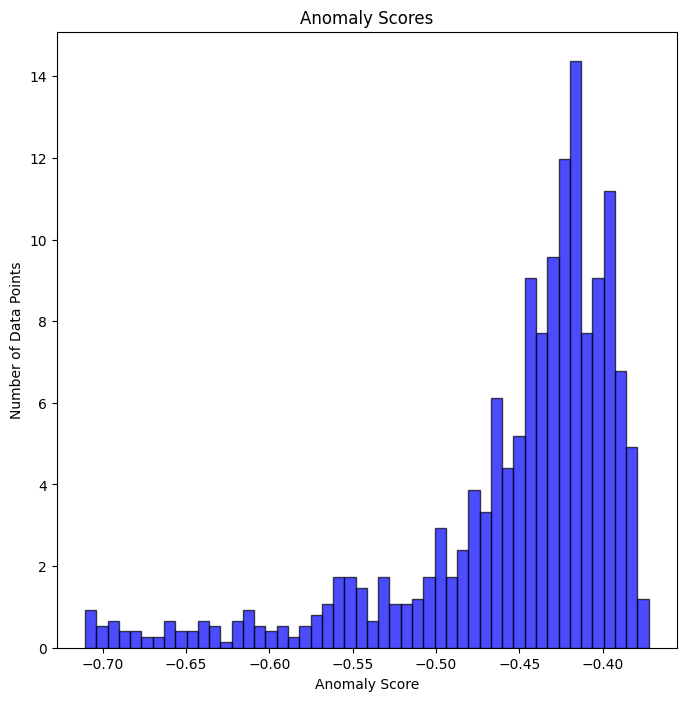

In [191]:
# plot histogram for the anomaly scores for the datapoints
plt.figure(figsize=(8,8))
plt.hist(scores, bins=50, color='blue', edgecolor='black', density=True, alpha=0.7)
plt.title('Anomaly Scores')
plt.xlabel('Anomaly Score')
plt.ylabel('Number of Data Points')
plt.show()



In [192]:
# predict anomalies on the validation and test sets
# pred_val = forest.predict(X_val_pca)
pred_test = forest.predict(selected_features_pca)

In [193]:
pred_test = pred_test.reshape(-1, 1)
pred_test.shape

(1111, 1)

In [194]:
selected_features['Anomaly'] = pred_test
selected_features['Anomaly'] = selected_features['Anomaly'].replace({1: 0, -1: 1})

In [195]:
selected_features['Anomaly'].value_counts()

Anomaly
0    889
1    222
Name: count, dtype: int64

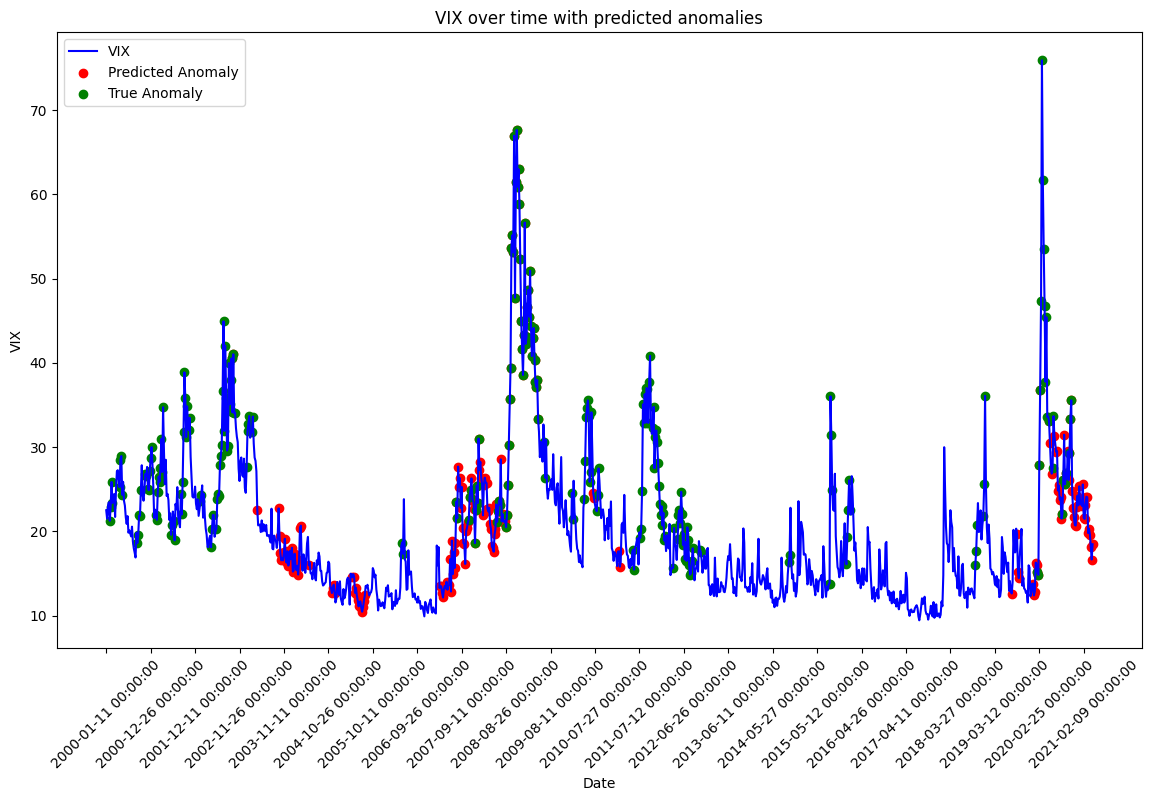

In [196]:
plt.figure(figsize=(14,8))
plt.plot(selected_features['VIX'], label='VIX', color='blue') 
plt.title(f"VIX over time with predicted anomalies") 

plt.scatter(
    selected_features[selected_features['Anomaly'] == 1].index,  # X-axis is the index of the anomalies
    selected_features[selected_features['Anomaly'] == 1]['VIX'],  # Y-axis is the value of the column for anomalies
    color='red', 
    label='Predicted Anomaly'
)
plt.scatter(
    df[df['Y'] == 1].index,  # X-axis is the index of the anomalies
    df[df['Y'] == 1]['VIX'],  # Y-axis is the value of the column for anomalies
    color='green', 
    label='True Anomaly'
)
plt.xticks(range(0, df.shape[0], 50), df['Date'].iloc[::50], rotation=45)
plt.xlabel("Date", fontsize=10)
plt.ylabel('VIX', fontsize=10)
plt.legend()
plt.show()